In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("BARMM_only.csv")

In [3]:
national = pd.read_csv("Family_Income_and_Expenditure.csv")

<h1>DESCRIPTIVE</h1>

<h1>Which main source of income is most common in BARMM?</h1>

In [4]:
most_common = df['Main Source of Income'].value_counts().idxmax()
most_common

'Enterpreneurial Activities'

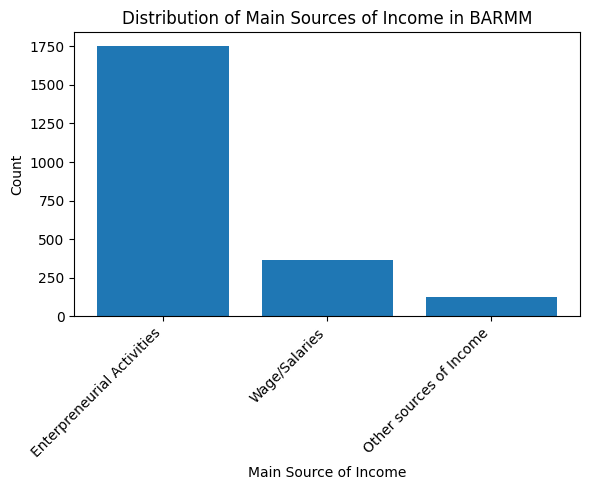

In [5]:
counts = df['Main Source of Income'].value_counts()

plt.figure(figsize=(6,5))
plt.bar(counts.index, counts.values)
plt.xlabel("Main Source of Income")
plt.ylabel("Count")
plt.title("Distribution of Main Sources of Income in BARMM")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<h1>COMPARISON BETWEEN NEEDS AND WANTS</h1>

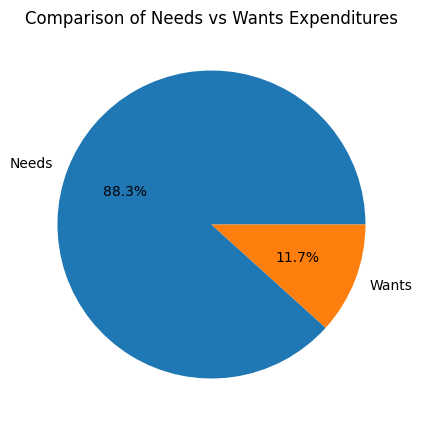

In [6]:
need_cols = [
    'Total Food Expenditure',
    'Total Rice Expenditure',
    'Bread and Cereals Expenditure',
    'Total Fish and  marine products Expenditure',
    'Vegetables Expenditure',
    'Meat Expenditure'
]

want_cols = [
    'Tobacco Expenditure',
    'Alcoholic Beverages Expenditure',
    'Restaurant and hotels Expenditure',
    'Miscellaneous Goods and Services Expenditure',
    'Transportation Expenditure'  # included as requested
]

# Compute total averages
need_total = df[need_cols].mean().sum()
want_total = df[want_cols].mean().sum()

# Prepare pie chart
labels = ['Needs', 'Wants']
sizes = [need_total, want_total]

plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Comparison of Needs vs Wants Expenditures")
plt.show()


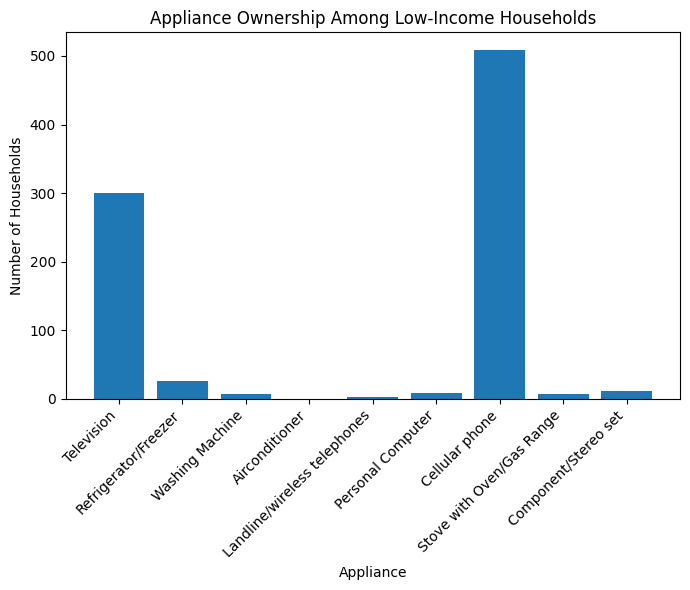

In [7]:
df['income_bracket'] = pd.qcut(df['Total Household Income'], 3, labels=['Low','Medium','High'])

# Appliances mapping
appliances = {
    'Television': 'Number of Television',
    'Refrigerator/Freezer': 'Number of Refrigerator/Freezer',
    'Washing Machine': 'Number of Washing Machine',
    'Airconditioner': 'Number of Airconditioner',
    'Landline/wireless telephones': 'Number of Landline/wireless telephones',
    'Personal Computer': 'Number of Personal Computer',
    'Cellular phone': 'Number of Cellular phone',
    'Stove with Oven/Gas Range': 'Number of Stove with Oven/Gas Range',
    'Component/Stereo set': 'Number of Component/Stereo set'
}

# Filter low-income households
low_group = df[df['income_bracket'] == 'Low']

# Count ownership
low_counts = {name: (low_group[col] > 0).sum() for name, col in appliances.items()}

# Prepare data for plotting
names = list(low_counts.keys())
values = list(low_counts.values())

# Plot bar chart
plt.figure(figsize=(7, 6))
plt.bar(names, values)
plt.xticks(rotation=45, ha='right')
plt.title("Appliance Ownership Among Low-Income Households")
plt.xlabel("Appliance")
plt.ylabel("Number of Households")
plt.tight_layout()
plt.show()


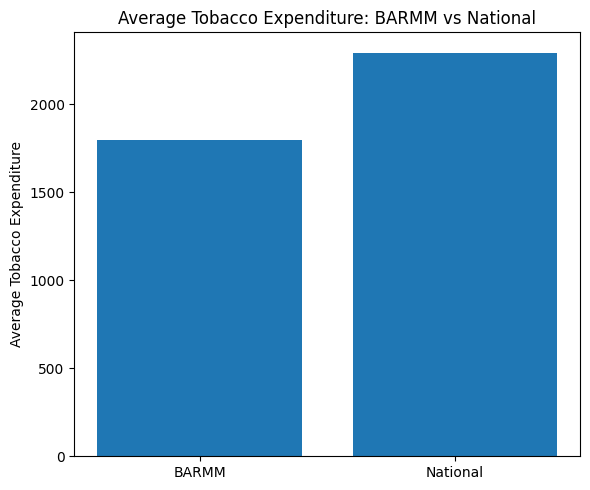

In [8]:
avg_barmm = df['Tobacco Expenditure'].mean()
avg_national = national['Tobacco Expenditure'].mean()

# Data for bar chart
labels = ['BARMM', 'National']
values = [avg_barmm, avg_national]

# Visualization
plt.figure(figsize=(6,5))
plt.bar(labels, values)
plt.ylabel('Average Tobacco Expenditure')
plt.title('Average Tobacco Expenditure: BARMM vs National')
plt.tight_layout()
plt.show()

<h1>DIAGNOSTIC</h1>

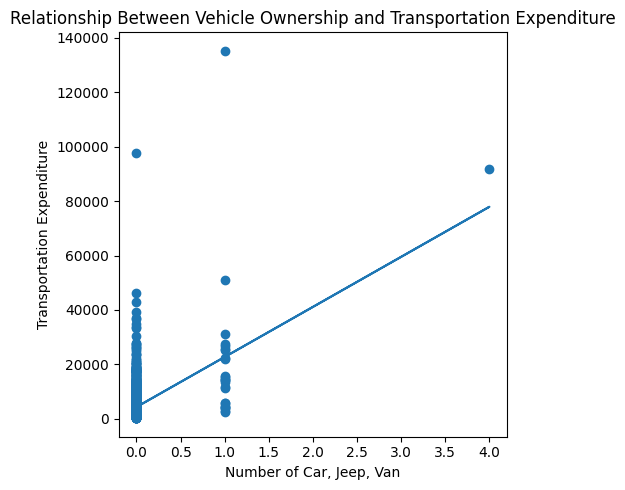

In [9]:
sub = df[['Number of Car, Jeep, Van','Transportation Expenditure']].dropna()

x = sub['Number of Car, Jeep, Van']
y = sub['Transportation Expenditure']

# Fit regression line
m, b = np.polyfit(x, y, 1)

# Plot scatter + regression line
plt.figure(figsize=(5,5))
plt.scatter(x, y)
plt.plot(x, m*x + b)
plt.xlabel("Number of Car, Jeep, Van")
plt.ylabel("Transportation Expenditure")
plt.title("Relationship Between Vehicle Ownership and Transportation Expenditure")
plt.tight_layout()
plt.show()

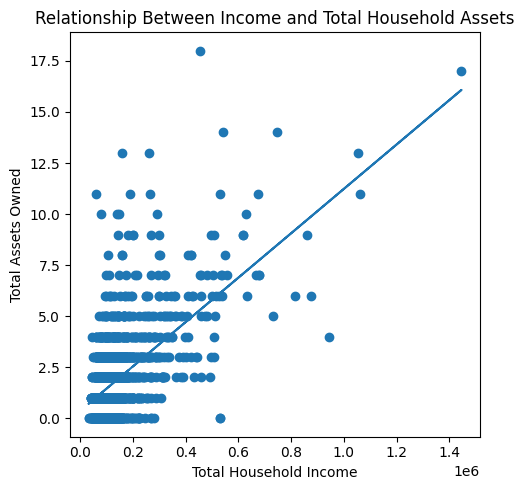

np.float64(0.5561488282406167)

In [10]:
assets = [
    'Number of Television',
    'Number of Refrigerator/Freezer',
    'Number of Washing Machine',
    'Number of Airconditioner',
    'Number of Landline/wireless telephones',
    'Number of Personal Computer',
    'Number of Cellular phone',
    'Number of Stove with Oven/Gas Range',
    'Number of Component/Stereo set'
]

# Compute total household assets
df['Total Assets Owned'] = df[assets].sum(axis=1)

# Compute correlation
corr_value = df[['Total Household Income', 'Total Assets Owned']].corr().iloc[0,1]

# Visualization: scatter + regression line
x = df['Total Household Income']
y = df['Total Assets Owned']

plt.figure(figsize=(5,5))
plt.scatter(x, y)

# regression line
import numpy as np
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel("Total Household Income")
plt.ylabel("Total Assets Owned")
plt.title("Relationship Between Income and Total Household Assets")
plt.tight_layout()
plt.show()

corr_value

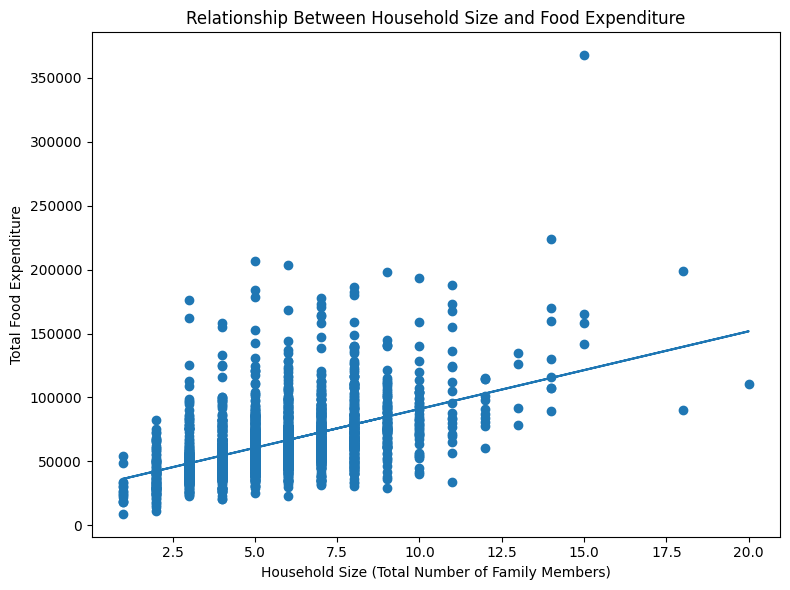

np.float64(0.5027766811161138)

In [11]:
sub = df[['Total Number of Family members', 'Total Food Expenditure']].dropna()

x = sub['Total Number of Family members']
y = sub['Total Food Expenditure']

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(x, y)

# Regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel("Household Size (Total Number of Family Members)")
plt.ylabel("Total Food Expenditure")
plt.title("Relationship Between Household Size and Food Expenditure")
plt.tight_layout()
plt.show()
corr_value = sub.corr().iloc[0,1]

corr_value

Correlation between income and total appliances owned:
0.5564086915602585


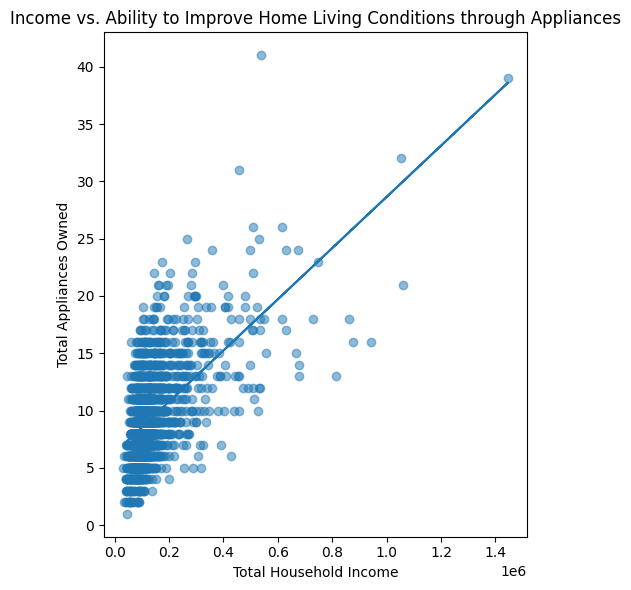

In [12]:
# --- 1. Identify all appliance columns (modify as needed) ---
appliance_cols = [
    col for col in df.columns
    if 'Number of' in col or 'Appliance' in col
]

# Calculate total appliances owned per household
df['TOTAL_APPLIANCES'] = df[appliance_cols].sum(axis=1)

# --- 2. Compute correlation ---
corr_value = df[['Total Household Income', 'TOTAL_APPLIANCES']].corr().iloc[0,1]
print("Correlation between income and total appliances owned:")
print(corr_value)

# --- 3. Visualization: Scatter + Regression Line ---
plt.figure(figsize=(5,6))
x = df['Total Household Income']
y = df['TOTAL_APPLIANCES']

plt.scatter(x, y, alpha=0.5)

# regression line
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel("Total Household Income")
plt.ylabel("Total Appliances Owned")
plt.title("Income vs. Ability to Improve Home Living Conditions through Appliances")
plt.tight_layout()
plt.show()

<h1>PREDICTIVE</h1>

<H1>Can household income be predicted using expenditure categories?</H1>

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


# --- Target variable ---
target = "Total Household Income"

# --- Identify expenditure columns (keyword-based filter) ---
expenditure_cols = [col for col in df.columns if "Expenditure" in col]

# --- Define features and target ---
X = df[expenditure_cols]
y = df[target]

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Train model ---
model = RandomForestRegressor(
    n_estimators=300,
    random_state=42
)
model.fit(X_train, y_train)

# --- Predict ---
y_pred = model.predict(X_test)

# --- Evaluation ---
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Using Only Expenditure Categories:")
print(f"Mean Absolute Error: {mae:,.2f}")
print(f"R² Score: {r2:.4f}")

print("\nExpenditure Columns Used:")
print(expenditure_cols)


Model Performance Using Only Expenditure Categories:
Mean Absolute Error: 26,647.39
R² Score: 0.7086

Expenditure Columns Used:
['Total Food Expenditure', 'Bread and Cereals Expenditure', 'Total Rice Expenditure', 'Meat Expenditure', 'Total Fish and  marine products Expenditure', 'Fruit Expenditure', 'Vegetables Expenditure', 'Restaurant and hotels Expenditure', 'Alcoholic Beverages Expenditure', 'Tobacco Expenditure', 'Clothing, Footwear and Other Wear Expenditure', 'Housing and water Expenditure', 'Medical Care Expenditure', 'Transportation Expenditure', 'Communication Expenditure', 'Education Expenditure', 'Miscellaneous Goods and Services Expenditure', 'Special Occasions Expenditure']


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



# --- Predictor (income) ---
X = df[["Total Household Income"]]

# --- Select appliance ownership columns ---
appliance_cols = [
    "Number of Television",
]

# Convert appliance counts into binary (0 = none, 1 = owns at least 1)
df_binary = df.copy()
for col in appliance_cols:
    df_binary[col] = df_binary[col].apply(lambda x: 1 if x > 0 else 0)

# --- Loop through each appliance and build a classifier ---
for appliance in appliance_cols:
    
    print(f"\n=== Predicting Ownership of: {appliance} ===")
    
    y = df_binary[appliance]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Logistic regression classifier
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test)
    
    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



=== Predicting Ownership of: Number of Television ===
Accuracy: 0.6267
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.92      0.74       255
           1       0.70      0.24      0.36       195

    accuracy                           0.63       450
   macro avg       0.66      0.58      0.55       450
weighted avg       0.65      0.63      0.57       450



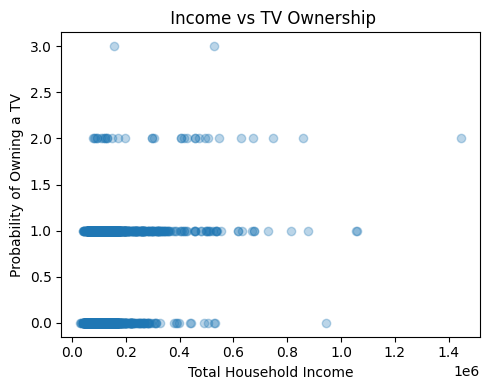

In [15]:
plt.figure(figsize=(5, 4))

plt.scatter(df["Total Household Income"], df["Number of Television"], alpha=0.3)
# plt.plot(income_vals, pred_prob)

plt.xlabel("Total Household Income")
plt.ylabel("Probability of Owning a TV")
plt.title(" Income vs TV Ownership")

plt.tight_layout()
plt.show()